<h1>Sentiment Analysis of Johns Hopkins Multi-Domain Sentiment Dataset </h1>

In [1]:
import pandas as pd

In [2]:
import os
path_to_data = "../sorted_data"
# path_to_processed_data = "processed"
dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        dirs.append(entry.path)
dirs[:3]

['../sorted_data/automotive',
 '../sorted_data/beauty',
 '../sorted_data/apparel']

<h5>Observation:</h5><br>
Here we created list of all the unprocessed dirs in our dataset.

<h3>Parsing XML Files</h3>
We need to do 2 things ro parse the XML doc properly:
<ul>
<li>Add parent root not to avoid junk eror while parsing XML as string.</li>
<li>Replace "&" with "&amp" to avoid not valid XML form error.</li>
</ul>

In [5]:
# for i in dirs:
#     product_type = i.split('/')[-1]
#     print(product_type)
    
#     for entry in os.scandir(i):
#         print(entry.path)
#         with open(entry.path,'r', encoding='ISO-8859-1') as f:
#             data = f.read()

#         with open(entry.path, 'w') as f:
#             f.write("<root>\n" + data + "\n</root>")
#             f.close()
   

music
/Users/taraldesai/Desktop/unprocessed/sorted_data/music/unlabeled.review
/Users/taraldesai/Desktop/unprocessed/sorted_data/music/.DS_Store
/Users/taraldesai/Desktop/unprocessed/sorted_data/music/all.review
/Users/taraldesai/Desktop/unprocessed/sorted_data/music/negative.review
/Users/taraldesai/Desktop/unprocessed/sorted_data/music/positive.review
video
/Users/taraldesai/Desktop/unprocessed/sorted_data/video/unlabeled.review
/Users/taraldesai/Desktop/unprocessed/sorted_data/video/.DS_Store
/Users/taraldesai/Desktop/unprocessed/sorted_data/video/all.review
/Users/taraldesai/Desktop/unprocessed/sorted_data/video/negative.review
/Users/taraldesai/Desktop/unprocessed/sorted_data/video/positive.review
health_&_personal_care
/Users/taraldesai/Desktop/unprocessed/sorted_data/health_&_personal_care/unlabeled.review
/Users/taraldesai/Desktop/unprocessed/sorted_data/health_&_personal_care/.DS_Store
/Users/taraldesai/Desktop/unprocessed/sorted_data/health_&_personal_care/all.review
/Users/t

In [7]:
# for i in dirs:
#     product_type = i.split('/')[-1]
#     print(product_type)
    
#     for entry in os.scandir(i):
#         print(entry.path)
#         with open(entry.path,'r', encoding='ISO-8859-1') as f:
#             data = f.read()
#             data = data.replace('&', '&amp;')

#         with open(entry.path, 'w') as f:
#             f.write(data)
#             f.close()

music
/Users/taraldesai/Desktop/unprocessed/sorted_data/music/unlabeled.review
/Users/taraldesai/Desktop/unprocessed/sorted_data/music/.DS_Store
/Users/taraldesai/Desktop/unprocessed/sorted_data/music/all.review
/Users/taraldesai/Desktop/unprocessed/sorted_data/music/negative.review
/Users/taraldesai/Desktop/unprocessed/sorted_data/music/positive.review
video
/Users/taraldesai/Desktop/unprocessed/sorted_data/video/unlabeled.review
/Users/taraldesai/Desktop/unprocessed/sorted_data/video/.DS_Store
/Users/taraldesai/Desktop/unprocessed/sorted_data/video/all.review
/Users/taraldesai/Desktop/unprocessed/sorted_data/video/negative.review
/Users/taraldesai/Desktop/unprocessed/sorted_data/video/positive.review
health_&_personal_care
/Users/taraldesai/Desktop/unprocessed/sorted_data/health_&_personal_care/unlabeled.review
/Users/taraldesai/Desktop/unprocessed/sorted_data/health_&_personal_care/.DS_Store
/Users/taraldesai/Desktop/unprocessed/sorted_data/health_&_personal_care/all.review
/Users/t

<h5>Observation:</h5><br>
Here we get all parsable files in correct formats in respective directories. 

In [3]:
import xml.etree.ElementTree as ET

tree = ET.parse('/Users/taraldesai/Desktop/unprocessed/sorted_data/apparel/unlabeled.review', parser = ET.XMLParser(encoding = 'iso-8859-5'))

From the above tree, we will get all the desired data in the form of data frames using pandas and xml.etree.ElementTree.

In [4]:
root = tree.getroot()
cols = ["unique_id", "asin", "product_name", "product_type", "helpful", "rating", "title", "date", "reviewer", "reviewer_location", "review_text"]
rows = []
for i in root:
    unique_id = i.find("unique_id").text
    asin = i.find("asin").text
    product_name = i.find("product_name").text
    product_type = i.find("product_type").text
    helpful = i.find("helpful").text
    rating = i.find("rating").text
    title = i.find("title").text
    date = i.find("date").text
    reviewer = i.find("reviewer").text
    reviewer_location = i.find("reviewer_location").text
    review_text = i.find("review_text").text
    rows.append({"unique_id": unique_id,
                 "asin": asin,
                 "product_name": product_name,
                 "product_type": product_type,
                 "helpful": helpful, 
                 "rating": rating, 
                 "title": title, 
                 "date": date, 
                 "reviewer": reviewer, 
                 "reviewer_location": reviewer_location, 
                 "review_text": review_text})
df = pd.DataFrame(rows, columns=cols)
df.head()

,unique_id,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text
0,"\nB00085FIPO:size_runs_big:j._gould_""south_paw...",\nB00085FIPO\n,\n3-Pack Baby Shorts: Apparel\n,\napparel\n,\n1 of 1\n,\n4.0\n,\nSize runs big\n,"\nMay 18, 2006\n","\nJ. Gould ""south_paw712""\n",\nKY\n,\nMy son is now over 12lbs at 6 weeks and thes...
1,\nB0007QCPAA:there_isn't_a_more_comfortable_te...,\nB0007QCPAA\n,\nadidas Men's Smith Millennium Tennis Shoe: A...,\napparel\n,\n\n,\n5.0\n,\nThere isn't a more comfortable tennis/casual...,"\nNovember 13, 2005\n",\nHannibal Lector\n,\nJersey\n,\nmade PERIOD!!. The leather on this shoe is g...
2,\nB0008DJTL0:a_great_running_shoe:xinyu_li\n,\nB0008DJTL0\n,\nadidas Originals Men's Adi Speed Suede Runni...,\napparel\n,\n1 of 1\n,\n5.0\n,\nA great running shoe\n,"\nNovember 14, 2006\n",\nXinyu Li\n,\n\n,"\nAdidas traditional running shoe, suede, nice..."
3,\nB00006LZYJ:delighted_to_have_the_same_conven...,\nB00006LZYJ\n,\nMelton Shoe by Johnston & Murphy: Apparel\n,\napparel\n,\n0 of 4\n,\n5.0\n,\nDelighted to have the same convenience to pu...,"\nNovember 4, 2002\n",\nPeter Ekanem\n,"\nMonterey, CA United States\n",\nThank you for these new line of offerings. S...
4,\nB000B5S85I:who_sewed_this?:lindolfo_meira\n,\nB000B5S85I\n,\nVintage Fatigue Style Cap (with or without S...,\napparel\n,\n\n,\n4.0\n,\nWho sewed this?\n,"\nNovember 9, 2006\n",\nLindolfo Meira\n,"\nPorto Alegre, RS Brazil\n","\nOkay, this cap is really stylish. But I thin..."


<h5>Observation:</h5><br>
Here we can see each column has line spaces ("\n") which should be stripped off.


In [5]:
for i in df.columns:
    df[i] = df[i].apply(lambda x : x.strip('\n'))
df.head()

,unique_id,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text
0,"B00085FIPO:size_runs_big:j._gould_""south_paw712""",B00085FIPO,3-Pack Baby Shorts: Apparel,apparel,1 of 1,4.0,Size runs big,"May 18, 2006","J. Gould ""south_paw712""",KY,My son is now over 12lbs at 6 weeks and these ...
1,B0007QCPAA:there_isn't_a_more_comfortable_tenn...,B0007QCPAA,adidas Men's Smith Millennium Tennis Shoe: App...,apparel,,5.0,There isn't a more comfortable tennis/casual shoe,"November 13, 2005",Hannibal Lector,Jersey,made PERIOD!!. The leather on this shoe is glo...
2,B0008DJTL0:a_great_running_shoe:xinyu_li,B0008DJTL0,adidas Originals Men's Adi Speed Suede Running...,apparel,1 of 1,5.0,A great running shoe,"November 14, 2006",Xinyu Li,,"Adidas traditional running shoe, suede, nice t..."
3,B00006LZYJ:delighted_to_have_the_same_convenie...,B00006LZYJ,Melton Shoe by Johnston & Murphy: Apparel,apparel,0 of 4,5.0,Delighted to have the same convenience to purc...,"November 4, 2002",Peter Ekanem,"Monterey, CA United States",Thank you for these new line of offerings. Som...
4,B000B5S85I:who_sewed_this?:lindolfo_meira,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,,4.0,Who sewed this?,"November 9, 2006",Lindolfo Meira,"Porto Alegre, RS Brazil","Okay, this cap is really stylish. But I think ..."


<h3>Generalization and creation of Processed Directory</h3>

We will create Function for the above function and try to apply it to each directory of Unprocessed and parse each XML file and place them inside new directory named Processed. 

In [6]:
import lxml.etree
parser = lxml.etree.XMLParser(encoding='utf-8', recover=True)

In [7]:
def get_text(tree):
   root = tree.getroot()
   cols = ["unique_id", "asin", "product_name", "product_type", "helpful", "rating", "title", "date", "reviewer", "reviewer_location", "review_text"]
   rows = []
   for i in root:
       if i.find("unique_id") is not None:
           unique_id = i.find("unique_id").text
       else:
          unique_id = ""
       if i.find("asin") is not None:
           asin = i.find("asin").text
       else:
           asin = ""
       if i.find("product_name") is not None:
           product_name = i.find("product_name").text
       else:
           product_name = ""
       if i.find("product_type") is not None:
            product_type = i.find("product_type").text
       else:
            product_type = ""
       if i.find("helpful") is not None:
            helpful = i.find("helpful").text
       else:
            helpful = ""
       if i.find("rating") is not None:
            rating = i.find("rating").text
       else:
            rating = ""
       if i.find("title") is not None:
            title = i.find("title").text
       else:
            title = ""
       if i.find("date") is not None:
            date = i.find("date").text
       else:       
            date = ""
       if i.find("reviewer") is not None:
            reviewer = i.find("reviewer").text
       else:
            reviewer = ""
       if i.find("reviewer_location") is not None:
            reviewer_location = i.find("reviewer_location").text
       else:
            reviewer_location = ""
       if i.find("review_text") is not None:
            review_text = i.find("review_text").text
       else:
            review_text = ""
       rows.append({"unique_id": unique_id,
                    "asin": asin,
                    "product_name": product_name,
                    "product_type": product_type,
                    "helpful": helpful, 
                    "rating": rating, 
                    "title": title, 
                    "date": date, 
                    "reviewer": reviewer, 
                    "reviewer_location": reviewer_location, 
                    "review_text": review_text})
   return pd.DataFrame(rows, columns=cols)


In [8]:
def strip_line_breaks(df):
    for i in df.columns:
        df[i] = df[i].apply(lambda x : x.strip('\n'))
    return df

In [9]:
# path_to_data = "/Users/taraldesai/Desktop/unprocessed/sorted_data"
path_to_processed_data = "/Users/taraldesai/Desktop/unprocessed/processed"

In [10]:
import shutil
if os.path.exists(path_to_processed_data):
     shutil.rmtree(path_to_processed_data)
os.mkdir(path_to_processed_data)

In [11]:
processed_dirs = []
processed_file_names_dict = {}
for dir in dirs:
    product_type = dir.split('/')[-1]
    processed_file_names_dict[product_type] = []
    for entry in os.scandir(dir):
        tree = ET.parse(entry.path, parser = parser)
        df = get_text(tree)
        df = strip_line_breaks(df)
        
        if tree is not None:
            processed_folder = path_to_processed_data + '/' + product_type
            if not os.path.exists(processed_folder):
                os.makedirs(processed_folder)
                processed_dirs.append(processed_folder)
                print("Generating processed files in folder: ",processed_folder)
            processed_file_name = product_type + "_" + ((entry.path).split('/')[-1]).split('.review')[0] + ".csv"
            processed_file_path = processed_folder + "/" + processed_file_name
            df.to_csv(processed_file_path, index=False)
            processed_file_names_dict[product_type].append(processed_file_path)

Generating processed files in folder:  /Users/taraldesai/Desktop/unprocessed/processed/automotive
Generating processed files in folder:  /Users/taraldesai/Desktop/unprocessed/processed/beauty
Generating processed files in folder:  /Users/taraldesai/Desktop/unprocessed/processed/apparel
Generating processed files in folder:  /Users/taraldesai/Desktop/unprocessed/processed/baby


In [12]:
processed_dirs

['/Users/taraldesai/Desktop/unprocessed/processed/automotive',
 '/Users/taraldesai/Desktop/unprocessed/processed/beauty',
 '/Users/taraldesai/Desktop/unprocessed/processed/apparel',
 '/Users/taraldesai/Desktop/unprocessed/processed/baby']

<h5>Observation:</h5><br>
Thus we get all the "Processed Directories". We stored their name as list as well as thir structure in the form of dictionary to easily access them when needed during the analysis. 

<h3>Cleaning of Apparel category</h3>

In [13]:
import re
import spacy

In [14]:
df_apparel = pd.read_csv(processed_file_names_dict['apparel'][1])
df_apparel.head()

,unique_id,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text
0,"B000AN11UA:disappointed:c._tina_""ctina401""",B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,1.0,disappointed,"March 10, 2006","C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...
1,B000AN11UA:cute_but_way_disappointing:katherin...,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,1.0,Cute But Way Disappointing,"January 13, 2006",Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,2.0,Camo Fatigue hat.,"November 3, 2006","Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...
3,B000B5S85I:what's_next?__the_swastika??:the_du...,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,1.0,What's next? The swastika??,"July 30, 2006","The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...
4,B00007LBZR:buyer_beware:david_s._schwartz,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,1.0,Buyer Beware,"April 20, 2005",David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...


In [15]:
df_apparel.shape

(9252, 11)

<h3> Remove product type from product_name in each row </h3>

In [16]:
df_apparel['product_name'] = df_apparel['product_name'].str.replace(': Apparel','')
df_apparel.head(30)

,unique_id,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text
0,"B000AN11UA:disappointed:c._tina_""ctina401""",B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,1.0,disappointed,"March 10, 2006","C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...
1,B000AN11UA:cute_but_way_disappointing:katherin...,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,1.0,Cute But Way Disappointing,"January 13, 2006",Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,2.0,Camo Fatigue hat.,"November 3, 2006","Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...
3,B000B5S85I:what's_next?__the_swastika??:the_du...,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,1.0,What's next? The swastika??,"July 30, 2006","The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...
4,B00007LBZR:buyer_beware:david_s._schwartz,B00007LBZR,Mens Collar Stays for Dress Shirts,apparel,19 of 21,1.0,Buyer Beware,"April 20, 2005",David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...
5,B0002XROVS:not_very_pleased:toni_reed,B0002XROVS,3-Pack Pants,apparel,NaN,1.0,Not very pleased,"November 6, 2006",Toni Reed,"Philadelphia, PA United States",THe pants that I ordered for my size were very...
6,B0006ZAZPE:design_flaw:raven_weng,B0006ZAZPE,Speedo Women's Endurance Flyback Swimsuit,apparel,3 of 5,1.0,Design flaw,"February 25, 2006",Raven Weng,"san gabriel, ca United States",I ordered the black one. According to the phot...
7,B0006ZAV4O:suit_was_too_small:xin_meng,B0006ZAV4O,Speedo Women's Lycra Quantum Splice Solid Swim...,apparel,2 of 3,2.0,Suit was too small,"August 7, 2006",Xin Meng,"Bronx, NY United States","Suit was too small, not enough information ava..."
8,"B00012BBB4:swim_suit_grab_bag:f._moore_""montana""",B00012BBB4,TYR Grab bag Female Suit,apparel,2 of 2,1.0,Swim suit grab bag,"March 3, 2006","F. Moore ""Montana""","Portland, Oregon",the swim suit was so unsatisfactory looking th...
9,B000FTSDGY:advertised_and_not_in_stock:marjori...,B000FTSDGY,Cotton Tagless T-Shirt by Champion (Style# T525),apparel,5 of 24,1.0,Advertised and not in STOCK,"July 31, 2006",Marjorie M. Atkins,NaN,IT was advertised and NOT IN STOCK so I was un...


<h3>Lowercase</h3>

In [17]:
df_apparel['new_title'] = df_apparel['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_apparel['new_title'].head()

0                   disappointed
1     cute but way disappointing
2              camo fatigue hat.
3    what's next? the swastika??
4                   buyer beware
Name: new_title, dtype: object

In [18]:
df_apparel['new_reviews'] = df_apparel['review_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_apparel['new_reviews'].head()

0    i want to start by saying fred flare- shipped ...
1    i have to say that i was disappointed when i o...
2    i am sorry but i did not like it nor will i we...
3    a red star!?!? i bet this won't sell well in e...
4    perhaps it is my own fault for not reading mor...
Name: new_reviews, dtype: object

<h3>Remove Punctuation</h3>

In [19]:
df_apparel['new_title'] = df_apparel['new_title'].str.replace('[^\w\s]','')
df_apparel['new_title'].head()

/var/folders/xr/q2_sc4pj5f92dt7k2r4k1s7c0000gp/T/ipykernel_6168/2568342041.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_apparel['new_title'] = df_apparel['new_title'].str.replace('[^\w\s]','')


0                  disappointed
1    cute but way disappointing
2              camo fatigue hat
3       whats next the swastika
4                  buyer beware
Name: new_title, dtype: object

In [20]:
df_apparel['new_reviews'] = df_apparel['new_reviews'].str.replace('[^\w\s]','')
df_apparel['new_reviews'].head()

/var/folders/xr/q2_sc4pj5f92dt7k2r4k1s7c0000gp/T/ipykernel_6168/1498375492.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_apparel['new_reviews'] = df_apparel['new_reviews'].str.replace('[^\w\s]','')


0    i want to start by saying fred flare shipped t...
1    i have to say that i was disappointed when i o...
2    i am sorry but i did not like it nor will i we...
3    a red star i bet this wont sell well in easter...
4    perhaps it is my own fault for not reading mor...
Name: new_reviews, dtype: object

<h3>Remove Emojis</h3>

In [21]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [22]:
df_apparel['new_title'] = df_apparel['new_title'].apply(lambda x: remove_emoji(x))
df_apparel['new_reviews'] = df_apparel['new_reviews'].apply(lambda x: remove_emoji(x))

<h3>Remove Stopwords</h3>

In [23]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Note: Here er manually downloaded stopwords from nltk using above code. 

In [24]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
stop = stopwords.words('english')

df_apparel['new_title'] = df_apparel['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df_apparel['new_reviews'] = df_apparel['new_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df_apparel.head(20)

,unique_id,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text,new_title,new_reviews
0,"B000AN11UA:disappointed:c._tina_""ctina401""",B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,1.0,disappointed,"March 10, 2006","C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...,disappointed,want start saying fred flare shipped product f...
1,B000AN11UA:cute_but_way_disappointing:katherin...,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,1.0,Cute But Way Disappointing,"January 13, 2006",Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...,Cute But Way Disappointing,say disappointed opened package containing ipo...
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,2.0,Camo Fatigue hat.,"November 3, 2006","Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...,Camo Fatigue hat.,sorry like wear big looks funny wish gotten
3,B000B5S85I:what's_next?__the_swastika??:the_du...,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,1.0,What's next? The swastika??,"July 30, 2006","The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...,What's next? The swastika??,red star bet wont sell well eastern europe
4,B00007LBZR:buyer_beware:david_s._schwartz,B00007LBZR,Mens Collar Stays for Dress Shirts,apparel,19 of 21,1.0,Buyer Beware,"April 20, 2005",David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...,Buyer Beware,perhaps fault reading closely failing question...
5,B0002XROVS:not_very_pleased:toni_reed,B0002XROVS,3-Pack Pants,apparel,NaN,1.0,Not very pleased,"November 6, 2006",Toni Reed,"Philadelphia, PA United States",THe pants that I ordered for my size were very...,Not pleased,pants ordered size small werent true size woul...
6,B0006ZAZPE:design_flaw:raven_weng,B0006ZAZPE,Speedo Women's Endurance Flyback Swimsuit,apparel,3 of 5,1.0,Design flaw,"February 25, 2006",Raven Weng,"san gabriel, ca United States",I ordered the black one. According to the phot...,Design flaw,ordered black one according photo provided sup...
7,B0006ZAV4O:suit_was_too_small:xin_meng,B0006ZAV4O,Speedo Women's Lycra Quantum Splice Solid Swim...,apparel,2 of 3,2.0,Suit was too small,"August 7, 2006",Xin Meng,"Bronx, NY United States","Suit was too small, not enough information ava...",Suit small,suit small enough information available site c...
8,"B00012BBB4:swim_suit_grab_bag:f._moore_""montana""",B00012BBB4,TYR Grab bag Female Suit,apparel,2 of 2,1.0,Swim suit grab bag,"March 3, 2006","F. Moore ""Montana""","Portland, Oregon",the swim suit was so unsatisfactory looking th...,Swim suit grab bag,swim suit unsatisfactory looking didnt even tr...
9,B000FTSDGY:advertised_and_not_in_stock:marjori...,B000FTSDGY,Cotton Tagless T-Shirt by Champion (Style# T525),apparel,5 of 24,1.0,Advertised and not in STOCK,"July 31, 2006",Marjorie M. Atkins,NaN,IT was advertised and NOT IN STOCK so I was un...,Advertised STOCK,advertised stock unable get


<h3>Lemmatization (Text Normalisation)</h3>

In [26]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [27]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df_apparel['new_reviews']= df_apparel['new_reviews'].apply(space)
df_apparel.head(20)

,unique_id,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text,new_title,new_reviews
0,"B000AN11UA:disappointed:c._tina_""ctina401""",B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,1.0,disappointed,"March 10, 2006","C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...,disappointed,want start say fred flare ship product fast tr...
1,B000AN11UA:cute_but_way_disappointing:katherin...,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,1.0,Cute But Way Disappointing,"January 13, 2006",Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...,Cute But Way Disappointing,say disappoint open package contain ipod walle...
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,2.0,Camo Fatigue hat.,"November 3, 2006","Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...,Camo Fatigue hat.,sorry like wear big look funny wish get
3,B000B5S85I:what's_next?__the_swastika??:the_du...,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,1.0,What's next? The swastika??,"July 30, 2006","The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...,What's next? The swastika??,red star bet will not sell well eastern europe
4,B00007LBZR:buyer_beware:david_s._schwartz,B00007LBZR,Mens Collar Stays for Dress Shirts,apparel,19 of 21,1.0,Buyer Beware,"April 20, 2005",David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...,Buyer Beware,perhaps fault read closely fail question somew...
5,B0002XROVS:not_very_pleased:toni_reed,B0002XROVS,3-Pack Pants,apparel,NaN,1.0,Not very pleased,"November 6, 2006",Toni Reed,"Philadelphia, PA United States",THe pants that I ordered for my size were very...,Not pleased,pant order size small be not true size would r...
6,B0006ZAZPE:design_flaw:raven_weng,B0006ZAZPE,Speedo Women's Endurance Flyback Swimsuit,apparel,3 of 5,1.0,Design flaw,"February 25, 2006",Raven Weng,"san gabriel, ca United States",I ordered the black one. According to the phot...,Design flaw,order black one accord photo provide suppose b...
7,B0006ZAV4O:suit_was_too_small:xin_meng,B0006ZAV4O,Speedo Women's Lycra Quantum Splice Solid Swim...,apparel,2 of 3,2.0,Suit was too small,"August 7, 2006",Xin Meng,"Bronx, NY United States","Suit was too small, not enough information ava...",Suit small,suit small enough information available site c...
8,"B00012BBB4:swim_suit_grab_bag:f._moore_""montana""",B00012BBB4,TYR Grab bag Female Suit,apparel,2 of 2,1.0,Swim suit grab bag,"March 3, 2006","F. Moore ""Montana""","Portland, Oregon",the swim suit was so unsatisfactory looking th...,Swim suit grab bag,swim suit unsatisfactory look do not even try ...
9,B000FTSDGY:advertised_and_not_in_stock:marjori...,B000FTSDGY,Cotton Tagless T-Shirt by Champion (Style# T525),apparel,5 of 24,1.0,Advertised and not in STOCK,"July 31, 2006",Marjorie M. Atkins,NaN,IT was advertised and NOT IN STOCK so I was un...,Advertised STOCK,advertise stock unable get


<h3>The steps used to complete the preprocessing and cleaning of data were:</h3>
<ol>
<li>Make text lowercase</li>
<li>Remove punctuation</li>
<li>Remove emoji’s</li>
<li>Remove stopwords</li>
<li>Lemmatization</li>
</ol>

<h1>Combined cleaning of 4 categories, i.e., Apparel, Automotive, Baby and Beauty.</h1>

In [28]:
df_apparel_1 = pd.read_csv(processed_file_names_dict['apparel'][1])
df_automotive = pd.read_csv(processed_file_names_dict['automotive'][1])
df_baby = pd.read_csv(processed_file_names_dict['baby'][1])
df_beauty = pd.read_csv(processed_file_names_dict['beauty'][1])

In [30]:
df_combine = pd.concat([df_apparel_1, df_automotive, df_baby, df_beauty], ignore_index=True)
df_combine.head()

,unique_id,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text
0,"B000AN11UA:disappointed:c._tina_""ctina401""",B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,1.0,disappointed,"March 10, 2006","C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...
1,B000AN11UA:cute_but_way_disappointing:katherin...,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,1.0,Cute But Way Disappointing,"January 13, 2006",Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,2.0,Camo Fatigue hat.,"November 3, 2006","Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...
3,B000B5S85I:what's_next?__the_swastika??:the_du...,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,1.0,What's next? The swastika??,"July 30, 2006","The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...
4,B00007LBZR:buyer_beware:david_s._schwartz,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,1.0,Buyer Beware,"April 20, 2005",David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...


In [32]:
df_combine.shape

(17128, 11)

In [33]:
df_combine['new_title'] = df_combine['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df_combine['new_reviews'] = df_combine['review_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df_combine['new_title'] = df_combine['new_title'].str.replace('[^\w\s]','')

df_combine['new_reviews'] = df_combine['new_reviews'].str.replace('[^\w\s]','')

df_combine['new_title'] = df_combine['new_title'].apply(lambda x: remove_emoji(x))

df_combine['new_reviews'] = df_combine['new_reviews'].apply(lambda x: remove_emoji(x))

df_combine['new_title'] = df_combine['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df_combine['new_reviews'] = df_combine['new_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df_combine['new_reviews']= df_combine['new_reviews'].apply(space)

/var/folders/xr/q2_sc4pj5f92dt7k2r4k1s7c0000gp/T/ipykernel_6168/3135036313.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_combine['new_title'] = df_combine['new_title'].str.replace('[^\w\s]','')
/var/folders/xr/q2_sc4pj5f92dt7k2r4k1s7c0000gp/T/ipykernel_6168/3135036313.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_combine['new_reviews'] = df_combine['new_reviews'].str.replace('[^\w\s]','')


<h3>Title & Review cleaned</h3>

In [34]:
df_combine.head()

,unique_id,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text,new_title,new_reviews
0,"B000AN11UA:disappointed:c._tina_""ctina401""",B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,1.0,disappointed,"March 10, 2006","C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...,disappointed,want start say fred flare ship product fast tr...
1,B000AN11UA:cute_but_way_disappointing:katherin...,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,1.0,Cute But Way Disappointing,"January 13, 2006",Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...,Cute But Way Disappointing,say disappoint open package contain ipod walle...
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,2.0,Camo Fatigue hat.,"November 3, 2006","Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...,Camo Fatigue hat.,sorry like wear big look funny wish get
3,B000B5S85I:what's_next?__the_swastika??:the_du...,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,1.0,What's next? The swastika??,"July 30, 2006","The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...,What's next? The swastika??,red star bet will not sell well eastern europe
4,B00007LBZR:buyer_beware:david_s._schwartz,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,1.0,Buyer Beware,"April 20, 2005",David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...,Buyer Beware,perhaps fault read closely fail question somew...


In [35]:
df_combine.describe()

,rating
count,17128.000000
mean,4.187296
std,1.344175
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [36]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17128 entries, 0 to 17127
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unique_id          17128 non-null  object 
 1   asin               17128 non-null  object 
 2   product_name       17128 non-null  object 
 3   product_type       17128 non-null  object 
 4   helpful            10644 non-null  object 
 5   rating             17128 non-null  float64
 6   title              17128 non-null  object 
 7   date               17115 non-null  object 
 8   reviewer           16890 non-null  object 
 9   reviewer_location  13526 non-null  object 
 10  review_text        17128 non-null  object 
 11  new_title          17128 non-null  object 
 12  new_reviews        17128 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.7+ MB


<h3>Polarity and Subjectivity of Review text</h3>

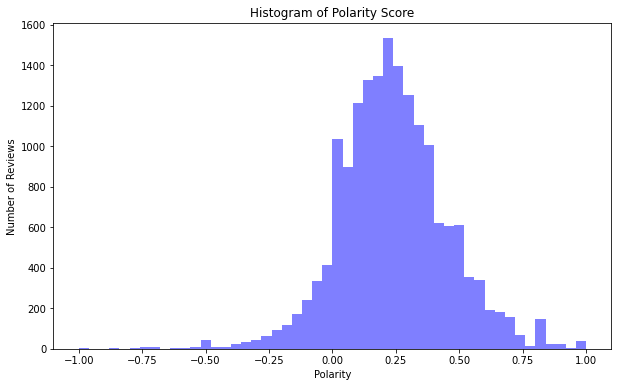

In [37]:
from textblob import TextBlob
# Create quick lambda functions to find the polarity of each review
# Terminal / Anaconda Navigator: conda install -c conda-forge textblobfrom textblob import TextBlob
df_combine['Text_blob']= df_combine['new_reviews'].astype(str) #Make sure about the correct data type
pol = lambda x: TextBlob(x).sentiment.polarity
df_combine['polarity'] = df_combine['new_reviews'].apply(pol) # depending on the size of your data, this step may take some time.
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_combine.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

<h5>Observation:</h5><br>
We can clearly see the data is skewed and most of the text has Positive polarity.

In [38]:
sub = lambda x: TextBlob(x).sentiment.subjectivity
df_combine['subjectivity'] = df_combine['new_reviews'].apply(sub)
df_combine.sample(5)

,unique_id,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text,new_title,new_reviews,Text_blob,polarity,subjectivity
13765,B0009RG8X2:winter_baby_must_have:chicagoparent,B0009RG8X2,JJ Cole Urban Bundleme Diva: Baby,baby,3 of 3,5.0,Winter Baby Must Have,"December 17, 2005",Chicagoparent,NaN,This is a must for any parent that lives in a ...,Winter Baby Must Have,must parent live cold climate use item daily b...,must parent live cold climate use item daily b...,0.189394,0.666667
8772,"B00070PH0G:great_jammer!:len_handeland_""on_lin...",B00070PH0G,Speedo Men's Solid Jammer Bathing Suit: Apparel,apparel,NaN,5.0,Great Jammer!,"November 4, 2006","Len Handeland ""on line maven""","San Francisco, CA USA",Sorry I am just getting to the review of this ...,Great Jammer!,sorry get review itmeof great item arrive exce...,sorry get review itmeof great item arrive exce...,0.520000,0.900000
7051,B000FL3EMU:cute_shoe!:a._florian,B000FL3EMU,Hype Women's Bunnie: Apparel,apparel,NaN,5.0,Cute Shoe!,"March 17, 2007",A. Florian,"Athens, Greece",When I got these shoes I was afraid that they ...,Cute Shoe!,get shoe afraid unconfortable surprise adorabl...,get shoe afraid unconfortable surprise adorabl...,0.166667,0.966667
102,"B0002OQGAW:lovely,_but_poor_color_quality:l._m.",B0002OQGAW,Intimo Men's Classic Silk Pajamas: Apparel,apparel,NaN,2.0,"Lovely, but POOR color quality","March 8, 2007",L. M.,"Concord, MA","These were a gift at Christmas, and were a dee...","Lovely, POOR color quality",gift christmas deep burgundy color appear well...,gift christmas deep burgundy color appear well...,0.077778,0.444444
8396,B000GLO4BO:amazon_sweatshirt:susan_nobile,B000GLO4BO,Amazon.com Men's Logo Fleece Crewneck Sweatshi...,apparel,NaN,5.0,amazon sweatshirt,"March 8, 2007",Susan Nobile,"Southold, NY USA",I bought this for my husband and he is very sa...,amazon sweatshirt,buy husband satisfy quality fit,buy husband satisfy quality fit,0.400000,0.400000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

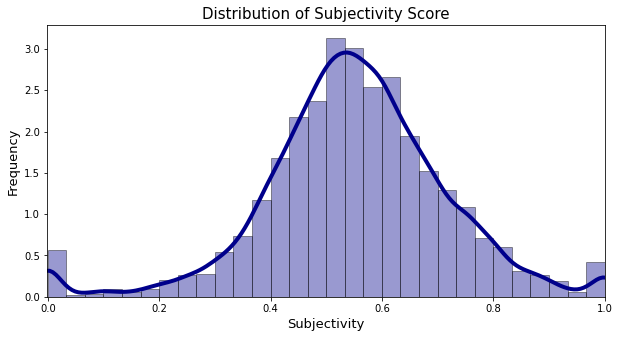

In [39]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df_combine['subjectivity'], hist=True, kde=True,
bins=int(30), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

<h5>Observation:</h5>
Subjective : Opinion <br>
Objective: Facts <br>
Thus, the dataset is nearly normal and good to go for building model. 

<h3>Split into Train/Test</h3>
<ul>
<li>Before we explore the dataset we're going to split it into training set and test sets.</li>
<li>Our goal is to eventually train a sentiment analysis classifier.</li>
<li>Since the majority of reviews are positive (5 stars), we will need to do a stratified split on the reviews score to ensure that we don't train the classifier on imbalanced data.</li>
<li>To use sklearn's Stratified ShuffleSplit class, we're going to remove all samples that have NAN in review score, then covert all review scores to integer datatype.</li>
</ul>

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(df_combine)))
df_combine_after = df_combine.dropna(subset=["rating"]) # removes all NAN in reviews.rating
print("After {}".format(len(df_combine_after)))
df_combine_after["rating"] = df_combine_after["rating"].astype(int)

Before 17128
After 17128


In [41]:

split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(df_combine_after, df_combine_after["rating"]): 
    strat_train = df_combine_after.reindex(train_index)
    strat_test = df_combine_after.reindex(test_index)

Check to see if train/test sets were stratified proportionately in comparison to raw data.

In [42]:
len(strat_train)

13702

In [43]:
strat_train["rating"].value_counts()/len(strat_train) # value_count() counts all the values based on column

5    0.632098
4    0.198803
1    0.106700
2    0.062400
Name: rating, dtype: float64

In [44]:
strat_test["rating"].value_counts()/len(strat_test)

5    0.632224
4    0.198774
1    0.106538
2    0.062464
Name: rating, dtype: float64

In [45]:
reviews = strat_train.copy()
reviews.head(2)

,unique_id,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text,new_title,new_reviews,Text_blob,polarity,subjectivity
13954,B0006BAJIQ:cute_and_works_well_too!:julie_tucker,B0006BAJIQ,Fisher&#45;Price Corner Bath Cubby: Baby,baby,2 of 2,5,Cute and works well too!,"April 18, 2006",Julie Tucker,NaN,I just purchased this bath toy organizer and I...,Cute works well too!,purchase bath toy organizer love fit perfectly...,purchase bath toy organizer love fit perfectly...,0.64,0.650000
5861,B000ANQXDU:overall_good_!:mitchell_j._peebles_...,B000ANQXDU,Harriton Contrast Tote Bag: Apparel,apparel,NaN,5,Overall GOOD !,"March 21, 2007","Mitchell J. Peebles ""Jeepstang86""",usa,"Nothing bad to say, the item i orderd was the ...",Overall GOOD !,nothing bad say item orderd item recieve arriv...,nothing bad say item orderd item recieve arriv...,-0.70,0.666667


<h3>Set Target Variable (Sentiments)</h3> <br>
Segregate ratings from 1-5 into positive, neutral, and negative.

In [46]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["rating"].apply(sentiments)
strat_train["Sentiment"][:20]

13954    Positive
5861     Positive
12108    Positive
7507     Positive
12172    Positive
1172     Positive
2515     Positive
11411    Positive
15789    Positive
2869     Positive
14323    Negative
9976     Positive
6036     Positive
999      Negative
10608    Negative
9416     Positive
12259    Positive
10178    Negative
14905    Positive
13304    Positive
Name: Sentiment, dtype: object

<h3> Extracting Features </h3>
Convering Review Text into numerical feature vectors using the <u><b>Bag of Words</b></u> strategy:<br>
<ol>
<li>Assign fixed integer id to each word occurrence (integer indices to word occurrence dictionary)</li>
<li>X[i,j] where i is the integer indices, j is the word occurrence, and X is an array of words (our training set)</li>
</ol>
In order to implement the <u><b>Bag of Words</b></u> strategy, we will use SciKit-Learn's CountVectorizer to performs the following:

<ol>
<li>Tokenization (breaking sentences into words)</li>
<li>Occurrence counting (builds a dictionary of features from integer indices with word occurrences)</li>
<li>Feature Vector (converts the dictionary of text documents into a feature vector)</li>
</ol>

In [47]:
# Prepare data
X_train = strat_train["new_reviews"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["new_reviews"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

13702 3426


In [48]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(13702, 23940)

<h5>Observation:</h5>
Here we have 14,502 training samples and 30,015 distinct words in our training sample.
<br>
Also, with longer documents, we typically see higher average count values on words that carry very little meaning, this will overshadow shorter documents that have lower average counts with same frequencies, as a result, we will use TfidfTransformer to reduce this redundancy:
<ul>
<li>Term Frequencies (Tf) divides number of occurrences for each word by total number of words</li>
<li>Term Frequencies times Inverse Document Frequency (Tfidf) downscales the weights of each word (assigns less value to unimportant stop words ie. "the", "are", etc)</li>
</ul>

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(13702, 23940)

<h3> Pipeline from the Extracted Features </h3>

We will use Multinominal Naive Bayes as our Classifier,
<ul>
<li>Multinominal Niave Bayes is most suitable for word counts where data are typically represented as word vector counts (number of times outcome number X[i,j] is observed over the n trials), while also ignoring non-occurrences of a feature i</li>
<li>Naive Bayes is a simplified version of Bayes Theorem, where all features are assumed conditioned independent to each other (the classifiers), P(x|y) where x is the feature and y is the classifier</li>
</ul>

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [51]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.8312901342673672

<h5>Observation:</h5>
Here we see that our Multinominal Naive Bayes Classifier has a 93.45% accuracy level based on the features.
<br>
Next we will conduct the following:
<ol>
<li>Test other models</li>
<li>Fine tune the best models to avoid over-fitting</li>
</ol>

<h3>Other Models</h3>

<h4>Logistic Regression Classifier:</h4>

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.8835376532399299

<h4>Support Vector Machine Classifier:</h4>

In [53]:

from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.9013426736719206

<h4>Decision Tree Classifier:</h4>

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.8245767659077642

<h4> Random Forest Classifier:</h4>

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.8660245183887916

<h5>Observation:</h5><br>
Most of the models gave accuracy in range of 80%-90%, so we will use the Support Vector Machine Classifier since it gives the highest accuracy level at 90.13%.
Now we will fine tune the Support Vector Machine model (Linear_SVC) to avoid any potential over-fitting.

<h3>Fine tuning the Support Vector Machine Classifier</h3>

<ul>
<li>Here we will run a Grid Search of the best parameters on a grid of possible values, instead of tweaking the parameters of various components of the chain (ie. use_idf in tfidftransformer)</li>
<li>We will also run the grid search with LinearSVC classifier pipeline, parameters and cpu core maximization</li>
<li>Then we will fit the grid search to our training data set</li>
<li>Next we will use our final classifier (after fine-tuning) to test some arbitrary reviews</li>
<li>Finally we will test the accuracy of our final classifier (after fine-tuning)</li>
</ul>

In [56]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_targetSentiment)
new_text = ["The tablet is good, really liked it.", # positive
            "The tablet is ok, but it works fine.", # neutral
            "The tablet is not good, does not work very well."] # negative

gs_clf_LinearSVC_pipe.predict(new_text)

array(['Positive', 'Positive', 'Negative'], dtype=object)

<h5>Observation:</h5><br>
Here we can see that when we use the model to provide sentimens on new_text, we get Positive, Positive & Negative, i.e, we get Positive even if the text is Neutral. This is because we dont have any Rating == 3 in our datset. Hence, no Neutral identification of sentiment.

In [57]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.9127262113251605

<h5>Observation:</h5><br>
After testing some arbitrary reviews, it seems that our features is performing correctly with Positive and Negative results
We also see that after running the grid search, our Support Vector Machine Classifier has improved to 91.27% accuracy level